<a href="https://colab.research.google.com/github/VindaShinde/VindaShinde/blob/main/Movies_Data_Module8_Vinda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies data analysis
 

Author - Vinda Shinde


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
movies_df = pd.read_csv("movies.csv")

# 1) Objective of the Proposed Research

As an analyst to Steven Spielberg who wants to produce a new movie for the summer, I want to showcase different data points to him. I have the data available with 6820 movies in the dataset (220 movies per year, 1986-2016), data is taken from Kaggle.

I will perform the Data exploration and try and find the best features to be included in the movie so that, as a producer, Steven should be able to get maximum returns on his investment.


In [ ]:
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
movies_df.describe()
#movies_df.shape

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [ ]:
movies_df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [ ]:
movies_df.dropna(inplace=True)
movies_df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [ ]:
movies_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

# 2) Data Exploration

In [ ]:
#sort data by score
higr_score_movies = movies_df.sort_values(by=['score'],ascending=False)
higr_score_movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,2.881729e+07,Castle Rock Entertainment,142.0
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1.005974e+09,Warner Bros.,152.0
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000.0,3.221612e+08,Universal Pictures,195.0
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000.0,2.139288e+08,Miramax,154.0
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,1.146031e+09,New Line Cinema,201.0


Listing the top scored moview to check their details.

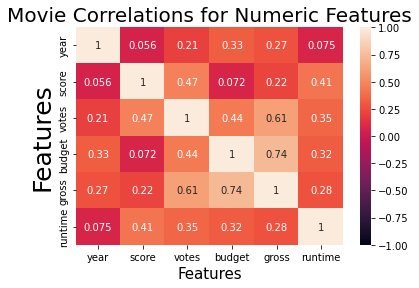

In [ ]:
#Correlations of numeric features
corr = movies_df.corr()
sns.heatmap(corr, annot=True, vmin=-1,)
plt.title('Movie Correlations for Numeric Features', size=20,%colors)
plt.xlabel('Features', size=15)
plt.ylabel('Features', size=25)
plt.show()

From the above correlation plot we can see that the movies with highest rating need not be of high budget and may not give higher returns. Because if we look at the plot, the score to budget ration is about 7% and acore to gross ration is 22% only.

At the same time, budget and gross have positive relation as well as votes and gross have positive relation.

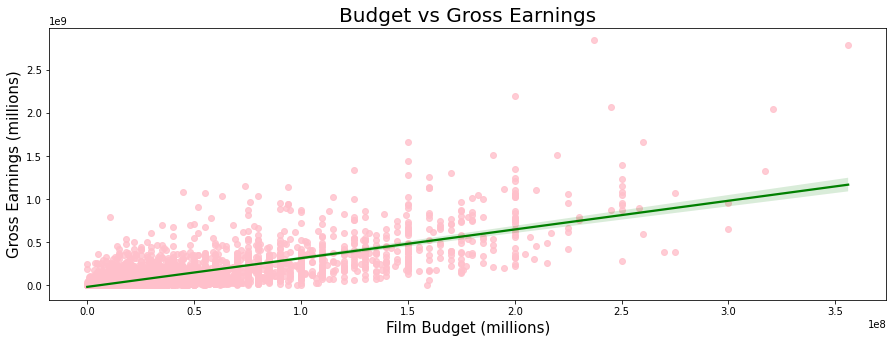

In [ ]:
#Scatter Plot for budget to gross
plt.figure(figsize=(15,5))
sns.regplot(x='budget', y='gross', data=movies_df, scatter_kws={'color':'pink'}, line_kws={'color':'green'})
plt.title('Budget vs Gross Earnings', size=20)
plt.xlabel('Film Budget (millions)', size=15)
plt.ylabel('Gross Earnings (millions)', size=15)

plt.show()

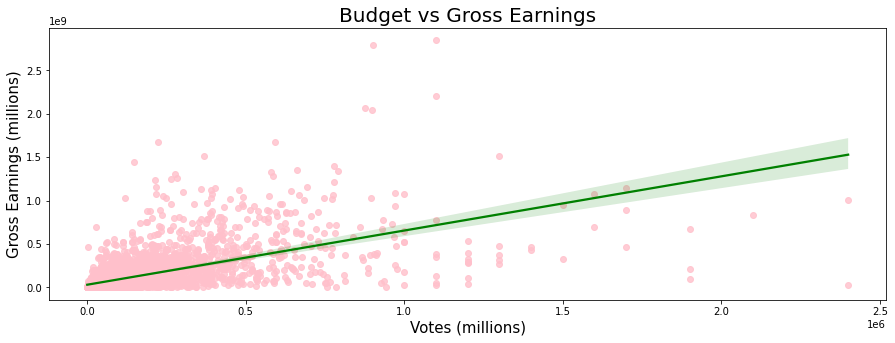

In [ ]:
#Scatter Plot for budget to gross
plt.figure(figsize=(15,5))
sns.regplot(x='votes', y='gross', data=movies_df, scatter_kws={'color':'pink'}, line_kws={'color':'green'})
plt.title('Budget vs Gross Earnings', size=20)
plt.xlabel('Votes (millions)', size=15)
plt.ylabel('Gross Earnings (millions)', size=15)

plt.show()

Post finding details for both the above plots it is very clear that, puplic votes and budget are mainly contributing to higher gross incomes from the movies.

# 3) Subsets of Data

In [ ]:
Genre_to_gross = movies_df.groupby(['genre'],as_index=False)['gross'].sum().sort_values(by='gross', ascending=False)
Genre_to_gross.reset_index()
Genre_to_gross.head(5)

,genre,gross
0,Action,2.377529e+11
4,Comedy,8.851482e+10
2,Animation,7.786591e+10
6,Drama,5.209856e+10
1,Adventure,4.357871e+10


The top 5 geners that are with the highest gross income starts from Action, Comedy, Animation, Drama and Adventure. So to get maximum money any of theses 5 generes will help.

In [ ]:
Director_to_score = movies_df.groupby(['director'],as_index=False)['score'].sum().sort_values(by='score', ascending=False)
Director_to_score.reset_index()
Director_to_score.head(5)

,director,score
2043,Woody Allen,231.3
327,Clint Eastwood,216.0
1859,Steven Spielberg,200.9
1623,Ridley Scott,159.3
1698,Ron Howard,157.2


The Top 5 directors whos movies are rated high are listed above, getting the movie directed by them will be liked by audiences.

In [ ]:
Start_to_votes = movies_df.groupby(['star'],as_index=False)['votes'].sum().sort_values(by='votes', ascending=False)
Start_to_votes.reset_index()
Start_to_votes.head(5)

,star,votes
1735,Tom Hanks,12421000.0
1073,Leonardo DiCaprio,12027000.0
297,Christian Bale,9985000.0
187,Brad Pitt,8698800.0
889,Johnny Depp,8280000.0


The highets voted movies are played by the top 5 actors above.

In [ ]:
Country_to_budget = movies_df.groupby(['country'],as_index=False)['budget'].sum().sort_values(by='budget', ascending=False)
Country_to_budget.reset_index()

Country_to_budget.head(5)


,country,budget
47,United States,1.614601e+11
46,United Kingdom,1.643202e+10
15,Germany,3.344750e+09
14,France,3.304500e+09
6,Canada,2.542177e+09


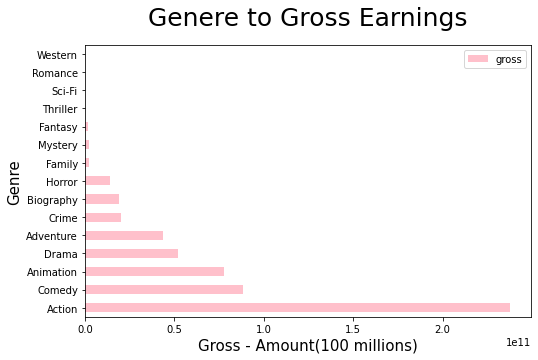

In [ ]:
Genre_to_gross.plot(kind='barh', x='genre', y='gross', color='pink', figsize=(8,5))
plt.title('Genere to Gross Earnings', size=25, y=1.05)
plt.ylabel('Genre', size=15)
plt.xlabel('Gross - Amount(100 millions)', size=15)
plt.show()

Post sorting by the Genre, the top 8 geners contribute to maximum gross earnings for movies production. The Action movies gives maximum gross incomes followed by Comedy, Animation, Drama, and Adventure.

In [ ]:
Year_to_gross = movies_df.groupby(['year'],as_index=False)['gross'].sum().sort_values(by='gross', ascending=False)
Year_to_gross.reset_index()
Year_to_gross.head(7)

,year,gross
36,2016,2.784756e+10
39,2019,2.769267e+10
37,2017,2.767980e+10
38,2018,2.755852e+10
35,2015,2.621691e+10
34,2014,2.619902e+10
33,2013,2.569966e+10


In [ ]:
Year_to_budget = movies_df.groupby(['year'],as_index=False)['budget'].sum().sort_values(by='budget', ascending=False)
Year_to_budget.reset_index()
Year_to_budget.head(7)

,year,budget
36,2016,8.785000e+09
33,2013,8.101670e+09
31,2011,7.868730e+09
32,2012,7.737295e+09
30,2010,7.652750e+09
29,2009,7.522500e+09
28,2008,7.483830e+09


# 4) Visualization

Text(0.5, 0, 'Amount(100 millions)')

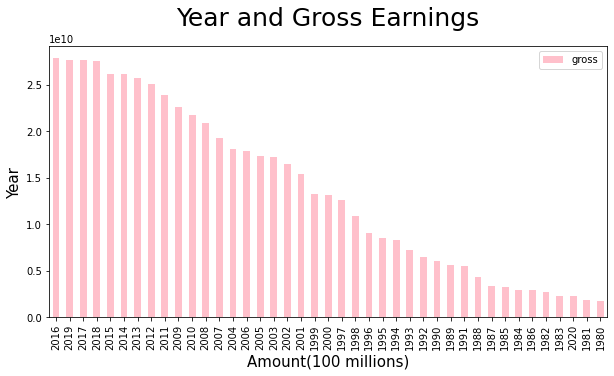

In [ ]:
Year_to_gross.plot(kind='bar', x='year', y='gross', color='pink', figsize=(10,5))
plt.title('Year and Gross Earnings', size=25, y=1.05)
plt.ylabel('Year', size=15)
plt.xlabel('Amount(100 millions)', size=15)



Text(0.5, 0, 'Amount(100 millions)')

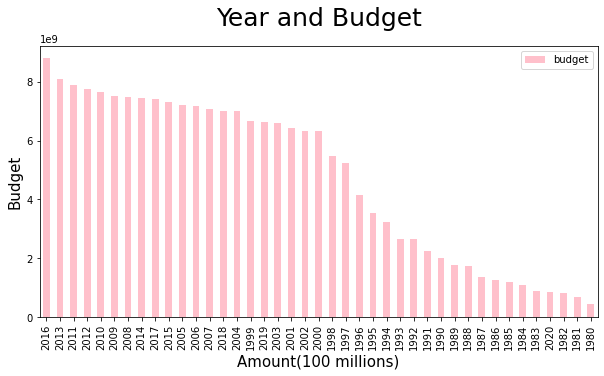

In [ ]:
Year_to_budget.plot(kind='bar', x='year', y='budget', color='pink', figsize=(10,5))
plt.title('Year and Budget', size=25, y=1.05)
plt.ylabel('Budget', size=15)
plt.xlabel('Amount(100 millions)', size=15)

From the plot we can observer that, the gross incomes are showing the similar trends with budget, where over the year the spend is increased and at the same way the gross income is increased on same range.



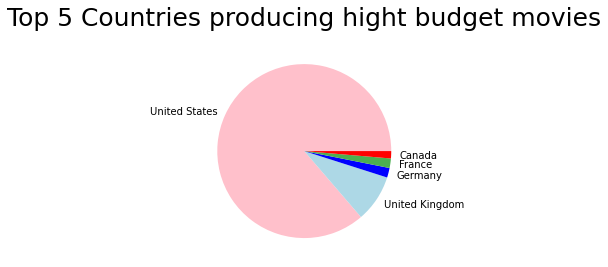

In [ ]:
Top_5_country = Country_to_budget.head(5)
mycolors = ["pink", "lightblue", "b", "#4CAF50", 'red']
plt.pie(Top_5_country.budget, labels=Top_5_country.country,colors=mycolors)
plt.title('Top 5 Countries producing hight budget movies', size=25, y=1.05)
plt.show()

Text(0.5, 0, 'Star Names')

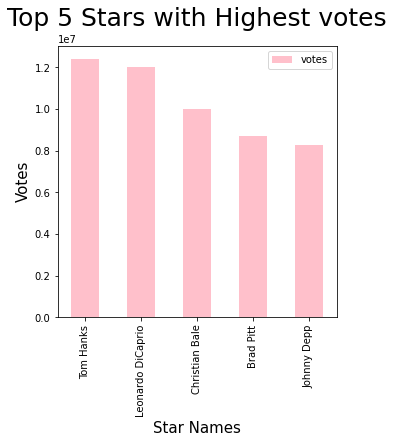

In [ ]:
Top_5_starts = Start_to_votes.head(5)
Top_5_starts.plot(kind='bar', x='star', y='votes', color='pink', figsize=(5,5))
plt.title('Top 5 Stars with Highest votes', size=25, y=1.05)
plt.ylabel('Votes', size=15)
plt.xlabel('Star Names', size=15)


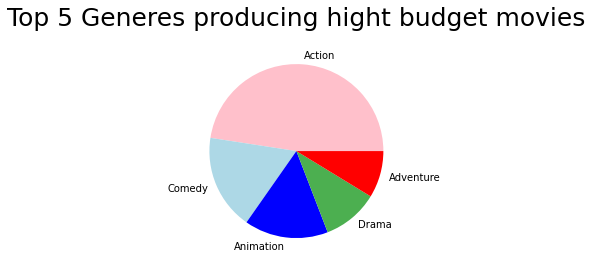

In [ ]:
Top_5_genere = Genre_to_gross.head(5)
mycolors = ["pink", "lightblue", "b", "#4CAF50", 'red']
plt.pie(Top_5_genere.gross, labels=Top_5_genere.genre,colors=mycolors,)
plt.title('Top 5 Generes producing hight budget movies', size=25, y=1.05)
plt.show()


Text(0.5, 0, 'Directors Name')

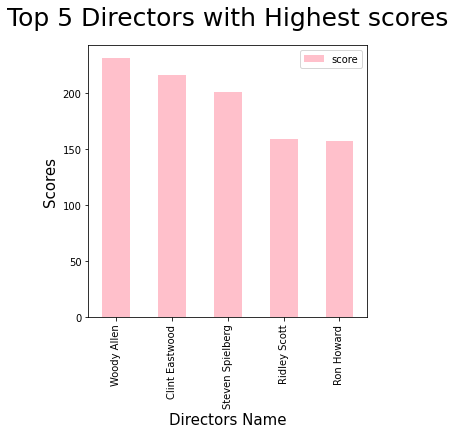

In [ ]:
Director_to_score

Top_5_directors = Director_to_score.head(5)
Top_5_directors.plot(kind='bar', x='director', y='score', color='pink', figsize=(5,5))
plt.title('Top 5 Directors with Highest scores', size=25, y=1.05)
plt.ylabel('Scores', size=15)
plt.xlabel('Directors Name', size=15)

 
# 5) Summary
From the overall analysis, it is observed that, 
- The trend of spending on more budget will help get the more gross income.
- It is observed that the highest rated movies need not be high budget movies or high gross income generators.
- Year over year the spending on the movie budget is increased and looks like it will continue.




 
# 6) Recommendation
If Steven Spielberg wants to produce a new movie for the summer then he should produce it himself as one of the most scored directors in the United States or the United Kingdom as movies released in these locations gives higher gross. Also, he should have the start cast including Tom Hanks, Leonardo Dicaprio, Christian Bale as these are the starts voted maximum by audiences so chances of getting more votes increases. He should also produce either Adventure or Comedy movies as its liked by maximum audiences.
